In [74]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import time


In [2]:
walk_scores = pd.read_csv('walk_scores.csv')
walk_scores.head()

,City,State,Walk Score,Transit Score,Bike Score,Population
0,New York,NY,89.2,85.3,67.7,8175133
1,Los Angeles,CA,67.4,51.5,55.1,3792621
2,Chicago,IL,77.8,65.0,71.5,2695598
3,Houston,TX,48.7,36.8,47.9,2099451
4,Philadelphia,PA,79.0,66.8,65.6,1526006


In [3]:
walk_scores['city_state'] = walk_scores['City'] + ', ' + walk_scores['State']
walk_scores.head()

,City,State,Walk Score,Transit Score,Bike Score,Population,city_state
0,New York,NY,89.2,85.3,67.7,8175133,"New York, NY"
1,Los Angeles,CA,67.4,51.5,55.1,3792621,"Los Angeles, CA"
2,Chicago,IL,77.8,65.0,71.5,2695598,"Chicago, IL"
3,Houston,TX,48.7,36.8,47.9,2099451,"Houston, TX"
4,Philadelphia,PA,79.0,66.8,65.6,1526006,"Philadelphia, PA"


In [4]:
cities_df = pd.read_csv('cities_df.csv')
cities_df.head()

,Unnamed: 0,CBSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Principal City Name,FIPS State Code,FIPS Place Code,STUSAB,State Name,STATENS,city_state,city_full_state,Miserable City,Happy City
0,0,10100,"Aberdeen, SD",Micropolitan Statistical Area,Aberdeen,46.0,100.0,SD,South Dakota,1785534,"Aberdeen, SD","Aberdeen, South Dakota",False,False
1,1,15100,"Brookings, SD",Micropolitan Statistical Area,Brookings,46.0,7580.0,SD,South Dakota,1785534,"Brookings, SD","Brookings, South Dakota",False,False
2,2,26700,"Huron, SD",Micropolitan Statistical Area,Huron,46.0,31060.0,SD,South Dakota,1785534,"Huron, SD","Huron, South Dakota",False,False
3,3,33580,"Mitchell, SD",Micropolitan Statistical Area,Mitchell,46.0,43100.0,SD,South Dakota,1785534,"Mitchell, SD","Mitchell, South Dakota",False,False
4,4,38180,"Pierre, SD",Micropolitan Statistical Area,Pierre,46.0,49600.0,SD,South Dakota,1785534,"Pierre, SD","Pierre, South Dakota",False,False


In [5]:
walk_scores_merge = pd.merge(walk_scores, cities_df, on='city_state')
walk_scores_merge

,City,State,Walk Score,Transit Score,Bike Score,Population,city_state,Unnamed: 0,CBSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Principal City Name,FIPS State Code,FIPS Place Code,STUSAB,State Name,STATENS,city_full_state,Miserable City,Happy City
0,New York,NY,89.2,85.3,67.7,8175133,"New York, NY",379,35620,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,New York,36.0,51000.0,NY,New York,1779796,"New York, New York",False,False
1,Los Angeles,CA,67.4,51.5,55.1,3792621,"Los Angeles, CA",856,31080,"Los Angeles-Long Beach-Anaheim, CA",Metropolitan Statistical Area,Los Angeles,6.0,44000.0,CA,California,1779778,"Los Angeles, California",False,False
2,Chicago,IL,77.8,65.0,71.5,2695598,"Chicago, IL",1093,16980,"Chicago-Naperville-Elgin, IL-IN-WI",Metropolitan Statistical Area,Chicago,17.0,14000.0,IL,Illinois,1779784,"Chicago, Illinois",False,False
3,Houston,TX,48.7,36.8,47.9,2099451,"Houston, TX",91,26420,"Houston-The Woodlands-Sugar Land, TX",Metropolitan Statistical Area,Houston,48.0,35000.0,TX,Texas,1779801,"Houston, Texas",False,False
4,Philadelphia,PA,79.0,66.8,65.6,1526006,"Philadelphia, PA",551,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Metropolitan Statistical Area,Philadelphia,42.0,60000.0,PA,Pennsylvania,1779798,"Philadelphia, Pennsylvania",False,False
5,Phoenix,AZ,40.8,36.0,52.4,1445632,"Phoenix, AZ",1248,38060,"Phoenix-Mesa-Chandler, AZ",Metropolitan Statistical Area,Phoenix,4.0,55000.0,AZ,Arizona,1779777,"Phoenix, Arizona",False,False
6,San Antonio,TX,37.6,36.1,41.9,1327407,"San Antonio, TX",127,41700,"San Antonio-New Braunfels, TX",Metropolitan Statistical Area,San Antonio,48.0,65000.0,TX,Texas,1779801,"San Antonio, Texas",False,False
7,San Diego,CA,50.9,37.0,39.4,1307402,"San Diego, CA",891,41740,"San Diego-Chula Vista-Carlsbad, CA",Metropolitan Statistical Area,San Diego,6.0,66000.0,CA,California,1779778,"San Diego, California",False,True
8,Dallas,TX,46.2,39.7,46.4,1197816,"Dallas, TX",72,19100,"Dallas-Fort Worth-Arlington, TX",Metropolitan Statistical Area,Dallas,48.0,19000.0,TX,Texas,1779801,"Dallas, Texas",False,False
9,San Jose,CA,50.5,41.3,59.3,945942,"San Jose, CA",907,41940,"San Jose-Sunnyvale-Santa Clara, CA",Metropolitan Statistical Area,San Jose,6.0,68000.0,CA,California,1779778,"San Jose, California",False,True


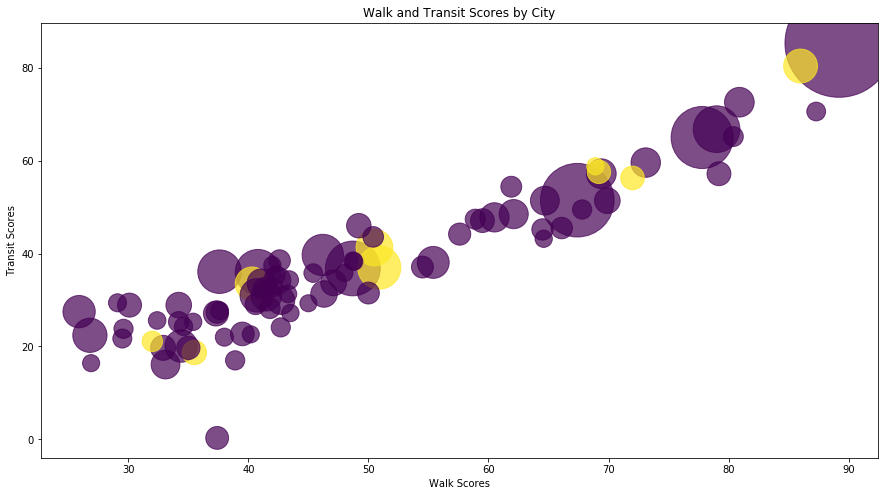

In [35]:
plt.figure(figsize=(15,8))
plt.scatter(walk_scores_merge['Walk Score'], walk_scores_merge['Transit Score'], s=walk_scores_merge['Population']/700, c=walk_scores_merge['Happy City'], alpha=0.7)

plt.xlabel('Walk Scores')
plt.ylabel('Transit Scores')
plt.title('Walk and Transit Scores by City')
plt.savefig('walk_transit.png')

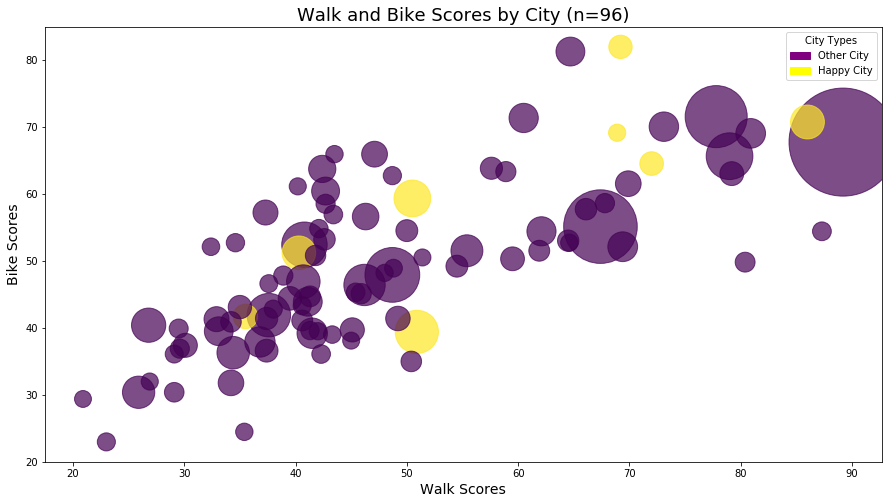

In [81]:
plt.figure(figsize=(15,8))
plt.scatter(walk_scores_merge['Walk Score'], walk_scores_merge['Bike Score'], s=walk_scores_merge['Population']/700, c=walk_scores_merge['Happy City'], alpha=0.7)
o_patch = mpatches.Patch(color='purple', label='Other City')
h_patch = mpatches.Patch(color='yellow', label='Happy City')

plt.xlabel('Walk Scores', fontsize=14)
plt.ylabel('Bike Scores', fontsize=14)
plt.title('Walk and Bike Scores by City (n=96)', fontsize=18)
plt.legend(handles=[o_patch, h_patch], title='City Types')

plt.savefig('walk_bike.png')

In [8]:
avg_walk_happy = walk_scores_merge.groupby(['Happy City'])['Walk Score'].mean()
avg_walk_happy_df = avg_walk_happy.to_frame()
avg_walk_happy_df

,Walk Score
Happy City,
False,47.383908
True,56.144444


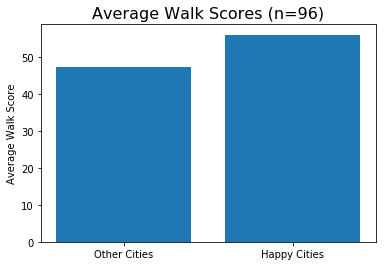

In [59]:
x_axis = ['Other Cities', 'Happy Cities']
plt.bar(x_axis, avg_walk_happy_df['Walk Score'])

plt.title("Average Walk Scores (n=96)", fontsize=16)
plt.ylabel("Average Walk Score")
plt.savefig('avg_walk.png')

In [10]:
avg_transit_happy = walk_scores_merge.groupby(['Happy City'])['Transit Score'].mean()
avg_transit_happy_df = avg_transit_happy.to_frame()
avg_transit_happy_df

,Transit Score
Happy City,
False,36.748718
True,44.966667


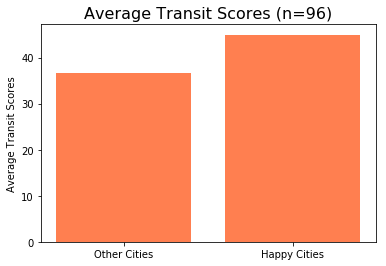

In [64]:
x_axis = ['Other Cities', 'Happy Cities']
plt.bar(x_axis, avg_transit_happy_df['Transit Score'], color='coral')

plt.title("Average Transit Scores (n=96)", fontsize=16)
plt.ylabel("Average Transit Scores")
plt.savefig('avg_transit.png')

In [12]:
avg_bike_happy = walk_scores_merge.groupby(['Happy City'])['Bike Score'].mean()
avg_bike_happy_df = avg_bike_happy.to_frame()
avg_bike_happy_df

,Bike Score
Happy City,
False,48.851724
True,59.725000


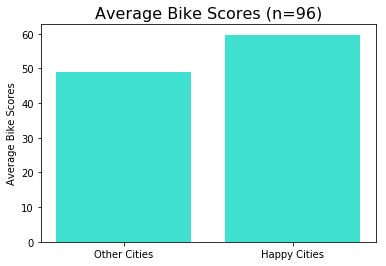

In [71]:
x_axis = ['Other Cities', 'Happy Cities']
plt.bar(x_axis, avg_bike_happy_df['Bike Score'], color='turquoise')

plt.title("Average Bike Scores (n=96)", fontsize=16)
plt.ylabel("Average Bike Scores")
plt.savefig('avg_bike.png')